BACKTEST -----------------------
WR: 60.00% | ROI: 10.50% | Drawdown: -10.00%
MedGain: 0.84 | MedLoss: -1.00 | EV: 0.11

REALIDADE -----------------------
WR: 40.00% | ROI: -31.60% | Drawdown: -6.26%
MedGain: 0.71 | MedLoss: -1.00 | EV: -0.32

Profit: -4.74 | Entradas: 15
Dias: 1 (1 totais)


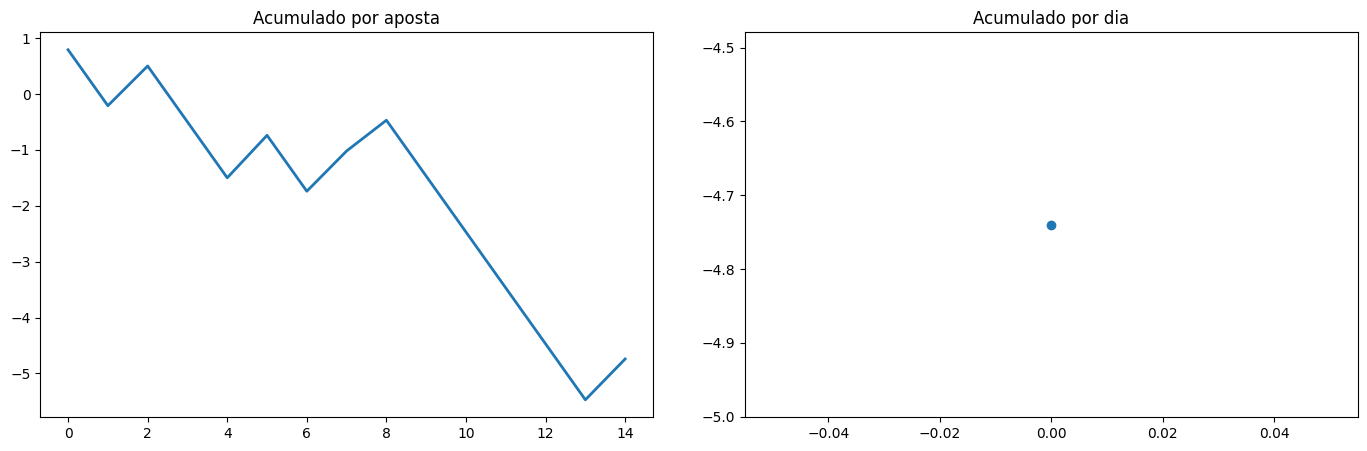


Dias --------------------------------------


,Date,Total_Profit,Odds_H,Acumulado
0,2023-12-09,-4.74,15,-4.74



Jogos -------------------------------------


,Date,Home,Away,Home_Pts,Away_Pts,Odds_H,Resultado,Profit,Acumulado
0,2023-12-09,Utsunomiya Brex,Brave Thunders,86,83,1.79,green,0.79,0.79
1,2023-12-09,Kretinga,Vilkaviskis,75,83,2.15,red,-1.00,-0.21
2,2023-12-09,Texas A&M-CC,Nebraska O.,62,58,1.71,green,0.71,0.50
3,2023-12-09,Incarnate Word,Northern Arizona,75,76,2.23,red,-1.00,-0.50
4,2023-12-09,Vermont,Colgate,71,77,1.69,red,-1.00,-1.50
5,2023-12-09,South Dakota Coyotes,Cal St. Bakersfield,78,73,1.76,green,0.76,-0.74
6,2023-12-09,South Carolina St,Bethune Cookman,71,80,1.71,red,-1.00,-1.74
7,2023-12-09,Mobis Phoebus,Anyang JungKwanJang,93,78,1.72,green,0.72,-1.02
8,2023-12-09,Pepperdine,UC San Diego,68,62,1.55,green,0.55,-0.47
9,2023-12-09,Cholet,JL Bourg,78,88,2.33,red,-1.00,-1.47


In [1]:
import pandas as pd; pd.set_option('display.max_columns', None)
import pandas as pd; pd.set_option('display.max_rows', None)
import glob
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import sys
sys.path.append('scripts/')
from Acompanhamento import *
METODO = 'back_home_v3'
TARGET = 'Back_Home'
ODDS = 'Odds_H'
SPREAD = 1
STAKE = 1


# Dados de backtest
wr = 60
roi = 10.5
drawdown = -10
med_gain = 0.84
med_loss = -1.00
ev = 0.11
df_all = pd.DataFrame()
dias = glob.glob('apostas_do_dia/*')

for dia in dias:
    dia = dia.split('\\')[1]
    dia = dia.split('.')[0]
    caminho = glob.glob(f'apostas_do_dia/{dia}/*{METODO}*')
    if len(caminho) == 0:
        continue
    caminho = caminho[0]
    df = pd.read_csv(caminho)
    df_all = pd.concat([df_all, df])

temp = pd.read_csv('data/Entire_Season.csv')
df_all = pd.merge(df_all, temp[['Date', 'Home', 'Away', 'Home_Pts', 'Away_Pts']], on=['Date', 'Home', 'Away'], how='left')
df_all = df_all.dropna(subset=['Home_Pts', 'Away_Pts'])
df_all['Home_Pts'] = df_all['Home_Pts'].astype(int)
df_all['Away_Pts'] = df_all['Away_Pts'].astype(int)

df_all.loc[(df_all['Home_Pts'] < df_all['Away_Pts']), TARGET] = 0
df_all.loc[(df_all['Home_Pts'] >= df_all['Away_Pts']), TARGET] = 1

df_all.loc[(df_all[TARGET] == 0), 'Profit'] = - STAKE
df_all.loc[(df_all[TARGET] == 1), 'Profit'] = ((df_all[ODDS] * SPREAD) - 1) * STAKE
df_all['Profit'] = df_all['Profit'].round(2)

print('BACKTEST -----------------------')
print(f'WR: {wr:.2f}% | ROI: {roi:.2f}% | Drawdown: {drawdown:.2f}%')
print(f'MedGain: {med_gain:.2f} | MedLoss: {med_loss:.2f} | EV: {ev:.2f}')

print('\nREALIDADE -----------------------')
df_odds, df_by_day = get_results(df_all, TARGET, ODDS)

print('\nDias --------------------------------------')
display(df_by_day)
print('\nJogos -------------------------------------')
display(df_odds)